In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
#plt.style.use('seaborn')

In [2]:
sns.set_style("ticks")

## Preparing the dataframes

In [3]:
df_all = pd.read_csv('data/dataport-export_gas_oct2015-mar2016.csv')
len(df_all)

1584823

In [4]:
df_all = df_all.set_index(pd.to_datetime(df_all['localminute']))

In [5]:
display(df_all.head(), df_all.tail())

,localminute,dataid,meter_value
localminute,,,
2015-10-01 05:00:10,2015-10-01 00:00:10-05,739,88858
2015-10-01 05:00:13,2015-10-01 00:00:13-05,8890,197164
2015-10-01 05:00:20,2015-10-01 00:00:20-05,6910,179118
2015-10-01 05:00:22,2015-10-01 00:00:22-05,3635,151318
2015-10-01 05:00:22,2015-10-01 00:00:22-05,1507,390354


,localminute,dataid,meter_value
localminute,,,
2016-04-01 04:59:14.336743,2016-03-31 23:59:14.336743-05,2129,201726
2016-04-01 04:59:17.427165,2016-03-31 23:59:17.427165-05,2945,161232
2016-04-01 04:59:35.370782,2016-03-31 23:59:35.370782-05,9729,138146
2016-04-01 04:59:47.816286,2016-03-31 23:59:47.816286-05,5129,166488
2016-04-01 04:59:58.923080,2016-03-31 23:59:58.92308-05,484,114174


In [6]:
df_all = df_all.drop(columns='localminute')
display(df_all.head())

,dataid,meter_value
localminute,,
2015-10-01 05:00:10,739,88858
2015-10-01 05:00:13,8890,197164
2015-10-01 05:00:20,6910,179118
2015-10-01 05:00:22,3635,151318
2015-10-01 05:00:22,1507,390354


In [7]:
groups = df_all.groupby('dataid')
keys = groups.groups.keys()  # keys: an iterable of dataids or meter ids

# check if each group (grouped by meter id) is sorted in ascending order by datetime.
# for key in keys:
#     df_i = groups.get_group(key)
#     print(df_i.index.is_monotonic_increasing)
# each group is already sorted in ascending order by datetime.

### Check meterids

In [8]:
keys_list = list(keys)
print(keys_list)

[35, 44, 77, 94, 114, 187, 222, 252, 370, 483, 484, 661, 739, 744, 871, 1042, 1086, 1103, 1185, 1283, 1403, 1415, 1507, 1556, 1589, 1619, 1697, 1714, 1718, 1790, 1791, 1792, 1800, 1801, 2018, 2034, 2072, 2094, 2129, 2233, 2335, 2378, 2449, 2461, 2470, 2575, 2638, 2645, 2755, 2814, 2818, 2945, 2946, 2965, 2980, 3036, 3039, 3134, 3310, 3367, 3527, 3544, 3577, 3635, 3723, 3778, 3849, 3893, 3918, 4029, 4031, 4193, 4228, 4296, 4352, 4356, 4373, 4421, 4447, 4514, 4671, 4732, 4767, 4874, 4998, 5129, 5131, 5193, 5275, 5317, 5395, 5403, 5439, 5484, 5545, 5636, 5658, 5785, 5810, 5814, 5892, 5972, 6101, 6412, 6505, 6578, 6673, 6685, 6830, 6836, 6863, 6910, 7016, 7017, 7030, 7117, 7287, 7429, 7460, 7566, 7674, 7682, 7739, 7741, 7794, 7900, 7919, 7965, 7989, 8059, 8084, 8086, 8155, 8156, 8244, 8386, 8467, 8703, 8829, 8890, 8967, 9052, 9121, 9134, 9160, 9278, 9295, 9474, 9600, 9620, 9631, 9639, 9729, 9766, 9849, 9956, 9982]


### Print full-length (6 mth) plot by meterid.

In [9]:
# for key in keys_list:    
#     df_i = groups.get_group(key)
#     df_i.drop(columns='dataid').plot(figsize=(15,4), title=str(f'meter {key}'))

In [10]:
key = 1185
df_i = groups.get_group(key)

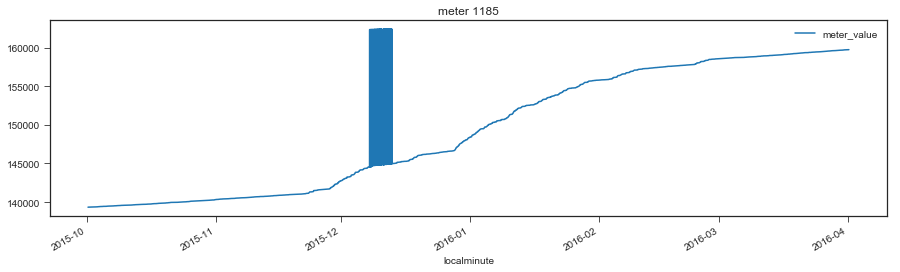

In [11]:
df_i.drop(columns='dataid').plot(figsize=(15,4), title=str(f'meter {key}'))

### Select data by datetime period. e.g. 1 month.

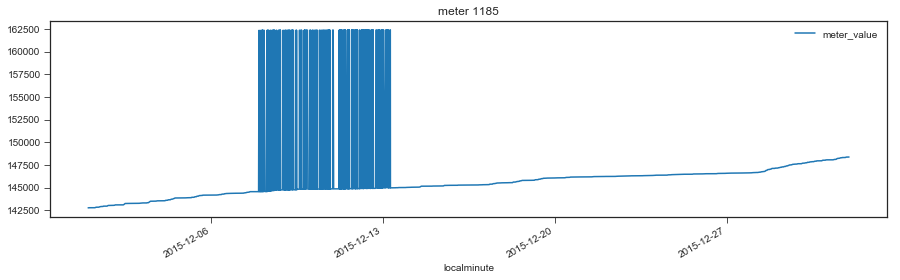

In [17]:
def zoom(df, start_date, end_date):
    # pre-condition: df is indexed by datetime.
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    mask = (df.index > start_date) & (df.index <= end_date)

    new_df = df.iloc[mask]
    return new_df
    
df_i_bymonth = zoom(df_i, '2015-12-01', '2016-01-01').drop(columns='dataid')
df_i_bymonth.plot(figsize=(15,4), title=str(f'meter {key}'))

### Resample with hourly frequency.

744

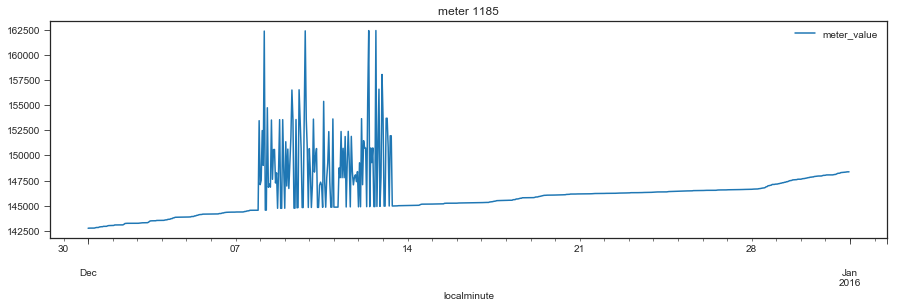

In [18]:
df_i_bymonth_resampled = df_i_bymonth.resample('H').mean().ffill()
df_i_bymonth_resampled.plot(figsize=(15,4), title=str(f'meter {key}'))
display(len(df_i_bymonth_resampled))

In [19]:
# todo: clean dirty data from faulty meters by extrapolating the clean data.

In [20]:
suspicious_meters_list = [1185, 1556, 2335, 2449, 3134, 3544, 4447, 4514, 4874, \
                          5129, 5403,6836, 7030, 7117, 8156, 9134, 9620, 9639, 9982]

### Zoom in deeper within the time period (e.g. one day/24h)

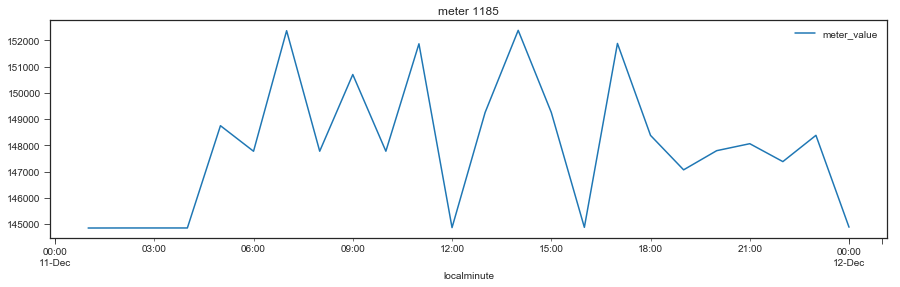

In [21]:
df_i_byday = zoom(df_i_bymonth_resampled, '2015-12-11', '2015-12-12')
df_i_byday.plot(figsize=(15,4), title=str(f'meter {key}'))